In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.pipeline import make_pipeline

In [6]:
iris = load_iris(as_frame=True)
X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model.fit(X_train,y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [9]:
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [ ]:
wrong = results[results['Actual'] != results['Predicted']]
correct = results[results['Actual'] == results['Predicted']]
print(wrong)

In [15]:
print("Model Accuracy: ", f"{accuracy_score(y_test,y_pred):.4f}")

Model Accuracy:  0.9111


<Axes: >

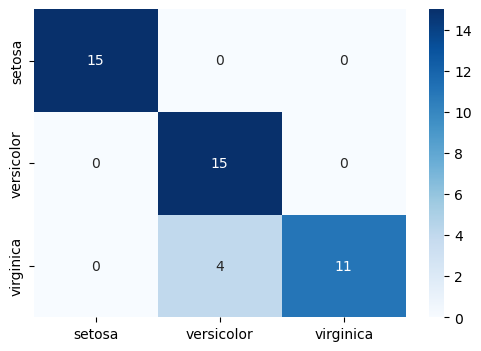

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Blues', fmt='d', annot=True, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)